# Statistical Thinking in Python (Part 1)
## Graphical Exploratory Data Analysis
Exploring your data is curucial step in your analysis.
* Organizing 
* Plotting 
* Computing a few numerical summaries

We are going to explore the 2008 US swing state election result which is at country level in each of the three major swing states of Pennslvanie, Ohio, and Florida.


In [9]:
#loading thelibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#seaborn is excellent matplotlib based statistical data visulation package
import seaborn as sns
sns.set()

In [2]:
swing_state = pd.read_csv('data/2008_swing_states.csv')
print(swing_state.head(15))

   state              county  total_votes  dem_votes  rep_votes  dem_share
0     PA         Erie County       127691      75775      50351      60.08
1     PA     Bradford County        25787      10306      15057      40.64
2     PA        Tioga County        17984       6390      11326      36.07
3     PA       McKean County        15947       6465       9224      41.21
4     PA       Potter County         7507       2300       5109      31.04
5     PA        Wayne County        22835       9892      12702      43.78
6     PA  Susquehanna County        19286       8381      10633      44.08
7     PA       Warren County        18517       8537       9685      46.85
8     OH    Ashtabula County        44874      25027      18949      56.94
9     OH         Lake County       121335      60155      59142      50.46
10    PA     Crawford County        38134      16780      20750      44.71
11    OH        Lucas County       219830     142852      73706      65.99
12    OH       Fulton Cou

We take the Democratic share of the vote in the countries of all the three swing state and plot them as a histogram. We are interested in the fraction of the vote to Brack Obama in
county. 

We can specified where the edge of the bars of histigrams are, the bin edges, and use the bins keywords arguments pass that to the plt.hist.

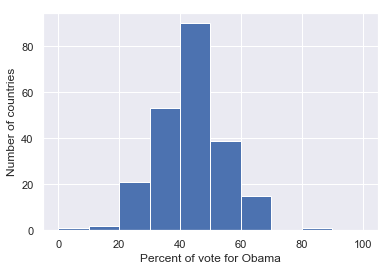

In [6]:
#we are goint to use  different binning
bin_edges = [0, 10,20,30,40,50,60,70,80,90,100]
_ = plt.hist(swing_state['dem_share'], bins=bin_edges)
#labeling the plot
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('Number of countries')
plt.show()

In the plot below, We have been use the bins=20 which create 20 evenly spaced bin by the default setting. 

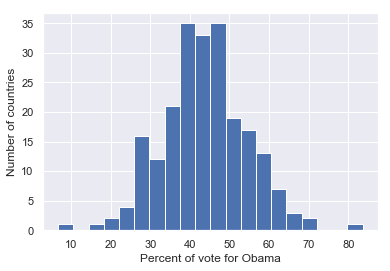

In [8]:
# 20 evenly spaced bins will create
_ = plt.hist(swing_state['dem_share'], bins =20)
#labeling the plot
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('Number of countries')
plt.show()

### Bee swarm plots
Here is the bee swarm plot of the vote totals in three  swing states.

Each point in the plot represent the share of the vote Obama got into single county. The y-axis gives us the quantitative information.

* We can clearly see that  Obama got less than 50% of the vote in the majority of couties in each the three swing states.

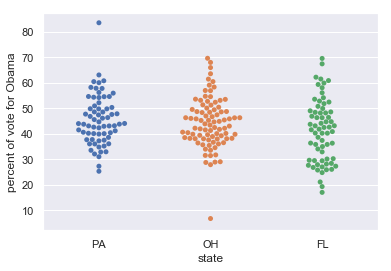

In [6]:
sns.swarmplot(x='state', y='dem_share', data=swing_state)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.show()

### Empirical cumulative distribution functions (ECDF)

We are going to plot ECDF for the percentege of vote that sent to Obama. The x-axis is percent of vote that vote for Obame. The y-axis is the fraction of data point that have  value smaller than the corresponding x-value.

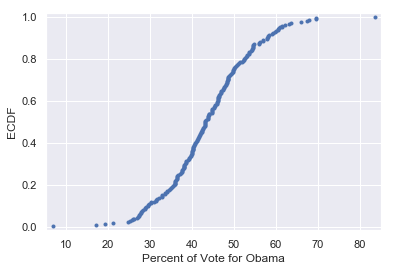

In [39]:
#We can use np.sort() to generate our x-data
x = np.sort(swing_state['dem_share'])
#y-axis is evenly speaced data point with a max 1.
y = np.arange(1, len(x) +1)/len(x)
_ = plt.plot(x,y, marker ='.', linestyle='none')
plt.xlabel('Percent of Vote for Obama')
plt.ylabel('ECDF')
#Keep the data off from plot edge
plt.margins(0.02) 
plt.show()

*75% of counties in swing states had 50% or less of its people vote for Obama*

In [20]:
swing_state['state'].unique()

array(['PA', 'OH', 'FL'], dtype=object)

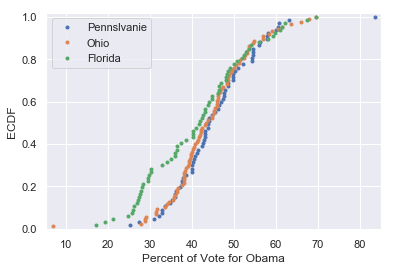

In [40]:
x_PA = np.sort(swing_state[swing_state['state'] =='PA']['dem_share'])
x_OH = np.sort(swing_state[swing_state['state'] =='OH']['dem_share'])
x_FL = np.sort(swing_state[swing_state['state'] =='FL']['dem_share'])

y_PA = np.arange(1, len(x_PA)+1)/len(x_PA)
y_OH = np.arange(1, len(x_OH)+1)/len(x_OH)
y_FL = np.arange(1, len(x_FL)+1)/len(x_FL)

_ = plt.plot(x_PA,y_PA, marker ='.', linestyle='none')
_ = plt.plot(x_OH,y_OH, marker ='.', linestyle='none')
_ = plt.plot(x_FL,y_FL, marker ='.', linestyle='none')
plt.xlabel('Percent of Vote for Obama')
plt.ylabel('ECDF')
plt.legend(['Pennslvanie', 'Ohio','Florida'])
#Keep the data off from plot edge
plt.margins(0.02) 
plt.show()

## Quantitative Exploratory Data Analysis
**Mean**: If you have a sample of n values,  $x_i$, the mean, $\mu$, is the sum of the values divided by the number of values:
\begin{equation}
\mu = \sum \frac{1}{n} x_i 
\end{equation}
**Outliers:** Data point whose value is far greater or less than most of the rest of the data.
* The mean highly effected from outliers <br>
**The median:** is the middle value of the dataset and is immune to data that have extreme values.The median is the special name for the 50th percentile.
Similiarly, the 25th percentile is the value of the data point that is greater than 25% of the sorted data.
```python
np.percentile(data, [25, 50, 75])
```

In [52]:
print('Mean: ', np.mean(swing_state['dem_share']))
print('Median: ',np.median(swing_state['dem_share']))

Mean:  43.76441441441444
Median:  43.185


In [43]:
np.percentile(swing_state['dem_share'], [25,50,75])

array([37.3025, 43.185 , 49.925 ])

### Box Plot
Box plot were invented by John Tukey to display some of the statistical features of the data set based on percentiles.

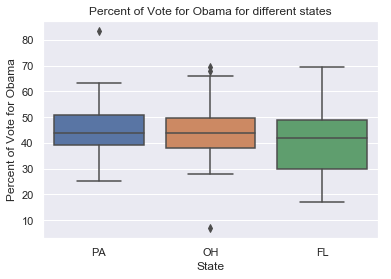

In [53]:
_ = sns.boxplot(x ='state', y= 'dem_share', data=swing_state)
_ = plt.title('Percent of Vote for Obama for different states')
_ = plt.xlabel('State')
_ = plt.ylabel('Percent of Vote for Obama')
plt.show()

Here we look at the box plot for percent of Vote for Obama for different states.
* The center of boxes are shown the median: 50th
* The edges of the boxes are shown the 25th and 75th percentile
* The total height of the box contains the 50% of the data and it is called interquartile range or **IQR**
* The whiskers extend the distance of 1.5 times IQR ot to the extent a distance of the data.
* All points outside of the whiskers are called outliers.

In [62]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
per_vers_x = np.percentile(x, percentiles)
per_vers_y = np.percentile(y, percentiles)
print(per_vers_x)
print(per_vers_y)

[25.58675 37.3025  43.185   49.925   64.7195 ]
[0.02939189 0.25337838 0.50225225 0.75112613 0.97511261]


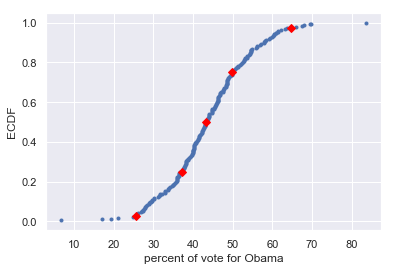

In [66]:
x = np.sort(swing_state['dem_share'])
y = np.arange(1, len(x) +1) /len(x)
percentiles = np.array([2.5, 25, 50, 75, 97.5])

_ = plt.plot(x,y, marker ='.', linestyle='none')
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

_ = plt.plot(per_vers_x, percentiles/100, marker='D', color='red', linestyle ='none')
plt.show()

### Variance and standard deviation
**Variance:** is intended to describe the spread of the data.
The variance is calculated as the average of the squared distance from mean. in python with numpy we can calculate the variance *nump.var()*
\begin{equation}
\sigma^2 = \frac{1}{n} \sum (x_i - \mu)^2
\end{equation}
$x_i - \mu$ is called deviation from mean so variance is the mean squared deviation. The square root of the variance, $\sigma$, is called the **standart deviation.** Standart deviation is resonable metric for the spread of the data and calculated with *numpy.std()* 


In [76]:
print('Variance: ', np.var(swing_state['dem_share']))
print('Standart deviation: ', np.std(swing_state['dem_share']))
print('Standart deviation is squared root of variance,' , np.sqrt(np.var(swing_state['dem_share'])))


Variance:  114.24649492735986
Standart deviation:  10.68861520157592
Standart deviation is squared root of variance, 10.68861520157592


### Covariance, and Pearson Correlation Coefficient
**Covariance** is a measure of the tendency of two variables to vary together.
If we have two series, X and Y, their deviations from the mean are
\begin{equation}
dx_i = x_i -  \mu_X \\
dy_i = y_i - \mu_Y
\end{equation}
where $\mu_X$ is the mean of X and $\mu_Y$ is the mean of Y. If X and Y vary together,
their deviations tend to have the same sign.

If we multiply them together, the product is *positive* when the deviations have the same sign and *negative* when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

*Covariance is the mean of these products:*

\begin{equation}
Cov(X,Y) = \frac{1}{n} \sum dx_i dy_i
\end{equation}
where n is the length of the two series (they have to be the same length).

We are going to make scatter plot for the percent of votes for Obama versus total number of votes in each county.

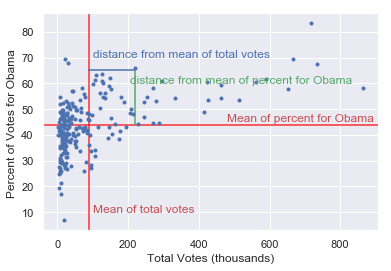

43.76441441441444
90.42451351351352


In [161]:
mean_of_dem_share = np.mean(swing_state['dem_share'])
mean_of_total_vote =np.mean(swing_state['total_votes'])/1000

_ = plt.plot(swing_state['total_votes']/1000, swing_state['dem_share'], marker='.',
            linestyle='none')
#drawing the mean of total votes
_ = plt.axvline(x=mean_of_total_vote, ymin=0, ymax= max(swing_state['total_votes']),
                color='red', zorder=1, alpha=0.8 )
_ = plt.text(480,45,'Mean of percent for Obama', color='r')
#draw tha mean of percent of votes for Obama
_ = plt.axhline(y=mean_of_dem_share, xmin=0, xmax= max(swing_state['dem_share']),
                color='red', zorder=1, alpha=0.8)
_ = plt.text(100, 10, 'Mean of total votes', color='r')

#distance from mean
_ = plt.vlines(x=220, ymin=44, ymax=65., color='g')
_ = plt.hlines(y=65, xmin=85, xmax=220, color='b')

_ = plt.text(100, 70, 'distance from mean of total votes', color='b')
_ = plt.text(205,60,'distance from mean of percent for Obama', color='g')
#_ =plt.axline()
#data point

_ = plt.xlabel('Total Votes (thousands)')
_ = plt.ylabel('Percent of Votes for Obama ')


plt.show()
print(mean_of_dem_share)
print(mean_of_total_vote)

* 12 of the counties with highes population is voted for Obama
* Most of the counties with small population is not voted for Obama

*if you look at the data point we point out*
Covariance is the mean of the product of diffences which is calculates using distance from mean of percent for Obama and distance from mean of toral votes.

**Postively Correlated:** If x and y both tend to be above, or both below their respective means together then covariance is positive

**Nagatively Correlated:** If x is high while y is low then covariance is negative or anticorrelated. 

If we want to have a more generaly applicable measure of how two varibales depend on each other, we want to be dimensionless. We can divide the covarince by standar deviation ($\sigma$) of x and y varianles.

**Pearson’s correlation ( $\rho$ ):** Pearson’s correlation is always between $-1$ and $+1$ (including both). The magnitude indicates the strength of the correlation. If $r = 1$ the variables are perfectly correlated, which means that if you know one, you can make a perfect prediction about the other. The same is true if $r = -1$. It means that the variables are negatively correlated, but for purposes of prediction, a negative correlation is just as good as a positive one. So if $r = 0$, does that mean there is no relationship between the variables? Unfortunately, no. Pearson’s correlation only measures linear relationships.

\begin{equation}
\rho = \frac{Cov(x,y)}{\sigma_x \sigma_y}
\end{equation}

The covariance may be computed using the Numpy function `np.cov()`. For example, we have two sets of data x and y, `np.cov(x, y) returns a 2D array` where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [171]:
Covariance_matrix = np.cov(swing_state['dem_share'], swing_state['total_votes'])
print('Covariance matrix between percent of vote for Obama and total votes is\n', Covariance_matrix)

Covariance matrix between percent of vote for Obama and total votes is
 [[1.14763447e+02 8.17309362e+05]
 [8.17309362e+05 2.02451039e+10]]


In [172]:
# let's compare variance x from var and covariance matrix
print('1: Variance of X from np.var():', np.var(swing_state['dem_share']))
print('2: Variance of X from covariance matrix', Covariance_matrix[0,0])

1: Variance of X from np.var(): 114.24649492735986
2: Variance of X from covariance matrix 114.76344739309454


In [173]:
# let's compare variance y from var and covariance matrix
print('1: Variance of y from np.var():', np.var(swing_state['total_votes']))
print('2: Variance of y from covariance matrix', Covariance_matrix[1,1])

1: Variance of y from np.var(): 20153909774.448013
2: Variance of y from covariance matrix 20245103936.323345


In [174]:
print('Covariance matrix between percent of vote for Obama and total votes is\n',Covariance_matrix[1,0])

Covariance matrix between percent of vote for Obama and total votes is
 817309.3618405284


In [175]:
pearson_coefficient = np.corrcoef(swing_state['dem_share'], swing_state['total_votes'])
print(pearson_coefficient[0,1])

0.536197364958678


# Probabilistic logic and statistical inference

Given a set of data, you describe probablitically what you might expect if those data were acquired again and again. This is the heart of statistical inference.

It is the process by which we go from measured data to probabilistic conclusions abaout waht we might expect if we collected the same data again.
## Random number generators and hacker statistics

We are going to think probabilistically using hacker statistics. The basic idea of hacker statistic is that instead of literally repating the data acquisition over and over again. We can simulate those repeated measurements using Python.

**Bernoulli trail** is an experiment that has two options "success" (True) or "failure" (False)

The pseudorandom number generator work by starting with an integer, called a seed, and then generates random number in succesion. the same seed gives the same the same sequence of random numbers hence the name pseudorandom number generation.

In [180]:
#Let's look at the simulation of 4 coin flips
n_all_heads = 0 
for i in range(10000):
    head = np.random.random(size=4) < 0.5
    n_head =np.sum(head)
    if (n_head==4):
        n_all_heads +=1
print('Probability of 10000 repeats ',n_all_heads/10000)   


Probability of 10000 repeats of the 4 flips trail 0.063


### Generating random numbers using the np.random module
We will be hammering the np.random module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, np.random.random() for a test spin. The function returns a random number between zero and one. Call np.random.random() a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument size=4 to np.random.random(). Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.
   

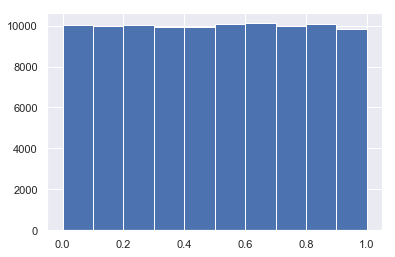

In [183]:
import numpy as np
#Seed the random number generator using the seed 42
np.random.seed(42)
#Initialize an empty array
random_numbers = np.empty(100000)
#-Write a for loop to draw 100,000 random numbers using np.random.random()
for i in range(100000):
    random_numbers[i] = np.random.random()
#Plot a histogram of random_numbers
_ =plt.hist(random_numbers)
plt.show()

### The np.random module and Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [185]:
#Define a function with signature perform_bernoulli_trials(n, p).
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success    

### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

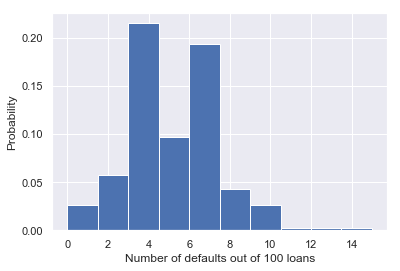

In [188]:
#Seed the random number generator to 42
np.random.seed(42)
#Initialize n_defaults with 1000 entries
n_defaults = np.empty(1000)
#Write a for loop with 1000 iterations to compute the number of defaults per 
#100 loans using the perform_bernoulli_trials() function
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

#print(n_defaults)
_ = plt.hist(n_defaults, density=True) 
_ = plt.xlabel('Number of defaults out of 100 loans')
_ = plt.ylabel('Probability')
plt.show()

### Will the bank fail?

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. 

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [189]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y

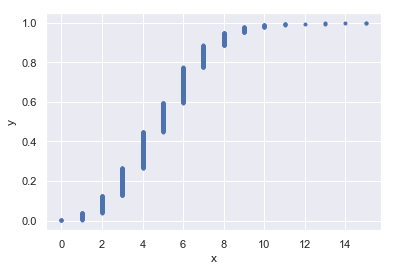

In [190]:
#Compute the x and y values for the ECDF of n_defaults
x, y = ecdf(n_defaults)
#-Plot the ECDF
_ = plt.plot(x, y , marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

plt.show()

In [191]:
#Compute the total number of entries in your n_defaults array that 
#were greater than or equal to 10
n_lose_money =np.sum(n_defaults >=10)
#fraction of n_defaults
print('Probability of losing money =', n_lose_money/len(n_defaults))

Probability of losing money = 0.022


## Probability distributions and stories: The Binomial distribution

**Probability Mass function(PMF):** is defined as the set of probabilities of discrete outcomes. (each results had the same or uniform probability)
**Binomial Distribution:** The number of r of successes in n *Bernoulli trails* with probability p of succes, is Binomially distrubuted.

### Sampling out of the Binomial distribution

Compute the probability mass function(PMF) for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the ECDF as last time. This ECDF that you are plotting is that of the Binomial distribution.


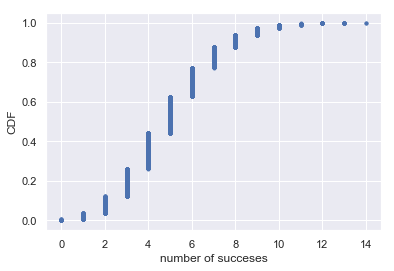

In [193]:
#set the Seed(42)
np.random.seed(42)
# Draw samples out of the Binomial distribution
n_binomial = np.random.binomial(100, 0.05, size=10000)

x, y = ecdf(n_binomial)
#Plot the ECDF
sns.set()
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of succeses')
_ = plt.ylabel('CDF')

plt.show()

### Plotting the Binomial PMF

We will plot the PMF of the Binomial distribution as a histogram. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.


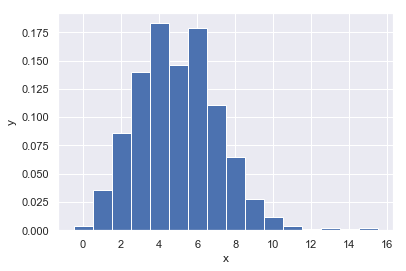

In [194]:
#Using np.arange(), compute the bin edges such that the bins are centered on the integers
bins = np.arange(min(n_defaults), max(n_defaults) +1.5) -0.5
#plot the histogram of n_defaults
_ = plt.hist(n_defaults, bins=bins, density=True)
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.show()

## Poisson processes and the Poisson distribution

**Poisson Process:** The timing of the next event is completely independent of when the previous event happend. 

The number of r of arrivials of a Poisson process in a given times interval with avarrage rate of $\lamda$ arrivials per interval is Poisson distrubutions.

### Relationship between Binomial and Poisson distributions

Poisson distribution is a limit of the Binomial distribution for rare events. Let's say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [195]:
#draw 10000 samples from a Poisson distribution with a mean of 10
sample_poisson = np.random.poisson(10, size=10000)
s_mean =np.mean(sample_poisson)
s_std = np.std(sample_poisson)
print('Poisson mean = %s, std = %s'%(s_mean, s_std) )

Poisson mean = 9.9732, std = 3.1276319732347027


In [196]:
#Make a list of the n and p values to consider for the Binomial distribution
n = [20,100, 1000]
p = [0.5, 0.1, 0.01]
for i in range(3):
    #draw 10000 samples from a Binomial distribution with each n, p pair
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)
    #print the mean and standard deviation of the samples
    b_mean = np.mean(samples_binomial)
    b_std =  np.std(samples_binomial)
    print('n =',n[i],', Binom mean = %s & std =%s'% (b_mean, b_std) )

n = 20 , Binom mean = 9.9999 & std =2.243858282066851
n = 100 , Binom mean = 9.9957 & std =2.998346462635698
n = 1000 , Binom mean = 9.997 & std =3.124162447761


### The Normal PDF

We will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

The normal distribution describes a continuous variable whose Probability density function (PDF) has a single symmetric peak. The Normal distribution is parametrized by two parameters, The mean, determines where the centr of the peak. The standart deviation is a measure how wide the peak is, or how spread out the data.

   #### Instructions
    
    1- Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
    
    2- Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.
    
    3- Hit 'Submit Answer' to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.

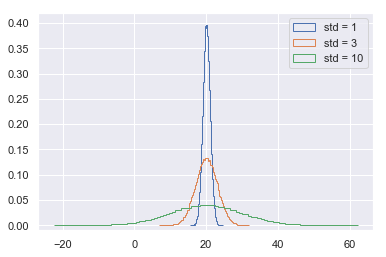

In [22]:
sample_std1  =  np.random.normal(20, 1,   size=100000)
sample_std3  =  np.random.normal(20, 3,   size=100000)
sample_std10 =  np.random.normal(20, 10,  size=100000)

_ = plt.hist(sample_std1,density=True, histtype='step', bins=100)
_ = plt.hist(sample_std3,density=True, histtype='step', bins=100)
_ = plt.hist(sample_std10, density=True,histtype='step', bins=100)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()



### The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as `samples_std1`, `samples_std3`, and `samples_std10`), generate and plot the CDFs.

   #### Instructions

    1- Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.

    2- Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).

    3- Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

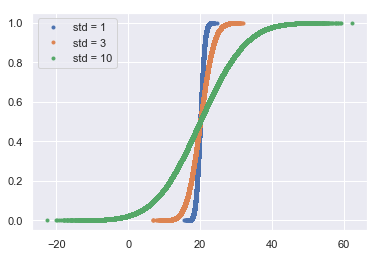

In [23]:
x_std1, y_std1 = ecdf(sample_std1)
x_std3, y_std3 = ecdf(sample_std3)
x_std10, y_std10 = ecdf(sample_std10)

sns.set()
_ = plt.plot(x_std1, y_std1, marker= '.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker= '.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker= '.', linestyle='none')

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.show()

### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the `fastest Belmont Stakes in history in 1973`. While that was the fastest year, `1970 was the slowest` because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

   #### Instructions

    1- Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.

    2- Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().

    3- Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.

    4-Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [24]:
belmont = pd.read_csv('data/belmont.csv')
print(belmont.head())

   Year            Winner           Jockey             Trainer  \
0  2016           Creator   Irad Ortiz, Jr      Steve Asmussen   
1  2015  American Pharoah  Victor Espinoza         Bob Baffert   
2  2014          Tonalist     Joel Rosario  Christophe Clement   
3  2013     Palace Malice       Mike Smith       Todd Pletcher   
4  2012        Union Rags   John Velazquez        Michael Matz   

                Owner     Time    Track  miles  
0    WinStar Farm LLC  2:28.51  Belmont    1.5  
1  Zayat Stables, LLC  2:26.65  Belmont    1.5  
2     Robert S. Evans  2:28.52  Belmont    1.5  
3      Dogwood Stable  2:30.70  Belmont    1.5  
4    Phyllis M. Wyeth  2:30.42  Belmont    1.5  


In [25]:
time = pd.DatetimeIndex(belmont['Time'])
belmont['Time_minute'] = time.hour*60 + time.minute + time.second /60
belmont['Time_minute'] =round(belmont['Time_minute'],2)
belmont_no_outliers = belmont['Time_minute']

In [26]:
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
print(mu, sigma)

149.21472527472534 1.7648785661051738


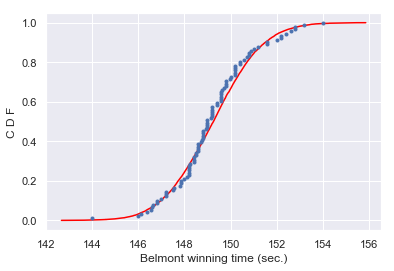

In [27]:
b_sample = np.random.normal(mu, sigma, size=10000)

b_x, b_y = ecdf(belmont_no_outliers)
bx_theory, by_theoty = ecdf(b_sample)

_ = plt.plot(bx_theory, by_theoty,color='red')
_ = plt.plot(b_x, b_y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('C D F')

plt.show()


What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

   #### Instructions

    1- Take 1,000,000 samples from the normal distribution using the np.random.normal() function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.

    2- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.

    3- Print the result.

In [28]:
samp  = np.random.normal(mu, sigma, size= 1000000)
prob = sum(samp <=144)/1000000
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.001548


### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

   #### Instructions

    1- Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.

    2- Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.

    3- Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.

    4- The function returns the sum of the waiting times for the two events.

In [29]:
def successive_poisson(tau1, tau2, size=1):
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1+t2

### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

#### Instructions

    1- Use your successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.

    2- Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use bins=100, normed=True, and histtype='step'.

    3- Label the axes.

    4-Show your plot

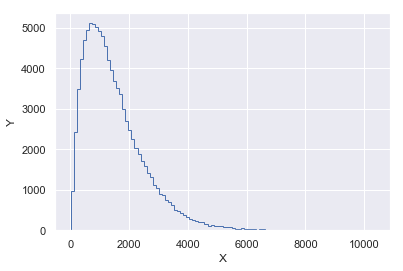

In [30]:
waiting_times = successive_poisson(764, 715, size=100000)

_ = plt.hist(waiting_times, bins=100, histtype='step')

_ = plt.xlabel('X')
_ = plt.ylabel('Y')
plt.show()